In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

y = mx + b

b = 5


In [5]:
y_true = (0.5 * x_data) + 5 + noise

In [6]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [7]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [8]:
my_data = pd.concat([x_df, y_df], axis=1)

In [9]:
sample_data = my_data.sample(250)

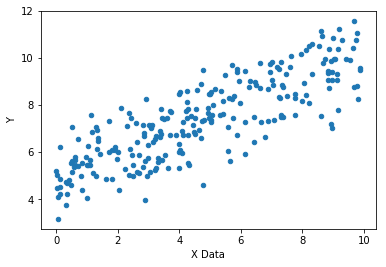

In [10]:
sample_data.plot(kind='scatter', x='X Data', y='Y')

In [11]:
batch_size = 8
# batch size required to steadily feed data into neural networks

In [12]:
np.random.randn(2)

array([-1.0326173 , -1.11146032])

In [13]:
m = tf.Variable(0.94)
b = tf.Variable(-1.05)

In [14]:
x_ph = tf.placeholder(tf.float32,[batch_size])
y_ph = tf.placeholder(tf.float32,[batch_size])

In [15]:
y_model = m * x_ph + b

In [16]:
error = tf.reduce_sum(tf.square(y_ph-y_model))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [18]:
train = optimizer.minimize(error)

In [19]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = { x_ph: x_data[rand_ind], y_ph: y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
    
    model_m, model_b = sess.run([m,b])
        

In [21]:
model_m

0.51977134

In [22]:
model_b

5.0122676

In [23]:
y_hat = x_data*model_m + model_b

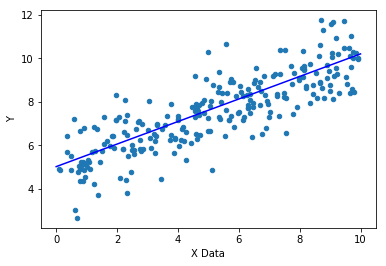

In [24]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'b')

In [29]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [30]:
feat_cols

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [31]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/28/6fl1s6897q17ww4ypjgd5p540000gn/T/tmpwnhiymvs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x181f00e2e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [35]:
x_train.shape

(700000,)

In [36]:
x_eval.shape

(300000,)

In [38]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, 
                                                batch_size=8, num_epochs=None, 
                                                shuffle=True)

In [39]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, 
                                                batch_size=8, num_epochs=1000, 
                                                shuffle=False)

In [40]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, 
                                                batch_size=8, num_epochs=1000, 
                                                shuffle=False)

In [41]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/28/6fl1s6897q17ww4ypjgd5p540000gn/T/tmpwnhiymvs/model.ckpt.
INFO:tensorflow:loss = 439.078, step = 1
INFO:tensorflow:global_step/sec: 565.803
INFO:tensorflow:loss = 23.55804, step = 101 (0.177 sec)
INFO:tensorflow:global_step/sec: 767.688
INFO:tensorflow:loss = 17.42059, step = 201 (0.129 sec)
INFO:tensorflow:global_step/sec: 782.235
INFO:tensorflow:loss = 6.829192, step = 301 (0.128 sec)
INFO:tensorflow:global_step/sec: 877.501
INFO:tensorflow:loss = 11.961758, step = 401 (0.114 sec)
INFO:tensorflow:global_step/sec: 936.145
INFO:tensorflow:loss = 17.099743, step = 501 (0.107 sec)
INFO:tensorflow:global_step/sec: 849.612
INFO:tensorflow:loss = 4.0925093, step = 601 (0.118 sec)
INFO:tensorflow:gl

In [42]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-02-16:10:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/28/6fl1s6897q17ww4ypjgd5p540000gn/T/tmpwnhiymvs/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-02-16:10:04
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0785279, global_step = 1000, loss = 8.628223


In [44]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-02-16:10:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/28/6fl1s6897q17ww4ypjgd5p540000gn/T/tmpwnhiymvs/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-02-16:10:41
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0902784, global_step = 1000, loss = 8.722227


In [46]:
print('Training data metrics')
print(train_metrics)

Training data metrics
{'average_loss': 1.0785279, 'loss': 8.628223, 'global_step': 1000}


In [47]:
print("Eval metrics")
print(eval_metrics)

Eval metrics
{'average_loss': 1.0902784, 'loss': 8.722227, 'global_step': 1000}


good indicator of overfitting: low loss on training, high loss on eval

should expect eval to do worse than training, but best to be relatively similar

In [49]:
brand_new_data = np.linspace(0,10,10)

In [50]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data },
                                                     shuffle=False)

In [52]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/28/6fl1s6897q17ww4ypjgd5p540000gn/T/tmpwnhiymvs/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.422298], dtype=float32)},
 {'predictions': array([5.0799336], dtype=float32)},
 {'predictions': array([5.737569], dtype=float32)},
 {'predictions': array([6.3952045], dtype=float32)},
 {'predictions': array([7.05284], dtype=float32)},
 {'predictions': array([7.710475], dtype=float32)},
 {'predictions': array([8.368111], dtype=float32)},
 {'predictions': array([9.025746], dtype=float32)},
 {'predictions': array([9.683382], dtype=float32)},
 {'predictions': array([10.341017], dtype=float32)}]

In [53]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])
    

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/28/6fl1s6897q17ww4ypjgd5p540000gn/T/tmpwnhiymvs/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [54]:
predictions

[array([4.422298], dtype=float32),
 array([5.0799336], dtype=float32),
 array([5.737569], dtype=float32),
 array([6.3952045], dtype=float32),
 array([7.05284], dtype=float32),
 array([7.710475], dtype=float32),
 array([8.368111], dtype=float32),
 array([9.025746], dtype=float32),
 array([9.683382], dtype=float32),
 array([10.341017], dtype=float32)]

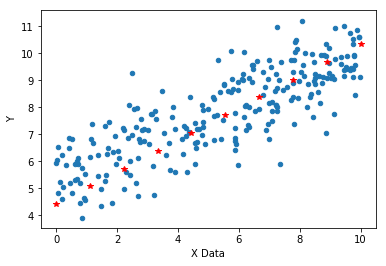

In [61]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r*')